# Homework 3 Question 4 - Figure 1

Reproduce Figure 1 in the paper.

In [15]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec
from matplotlib import pyplot as plt

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [16]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")

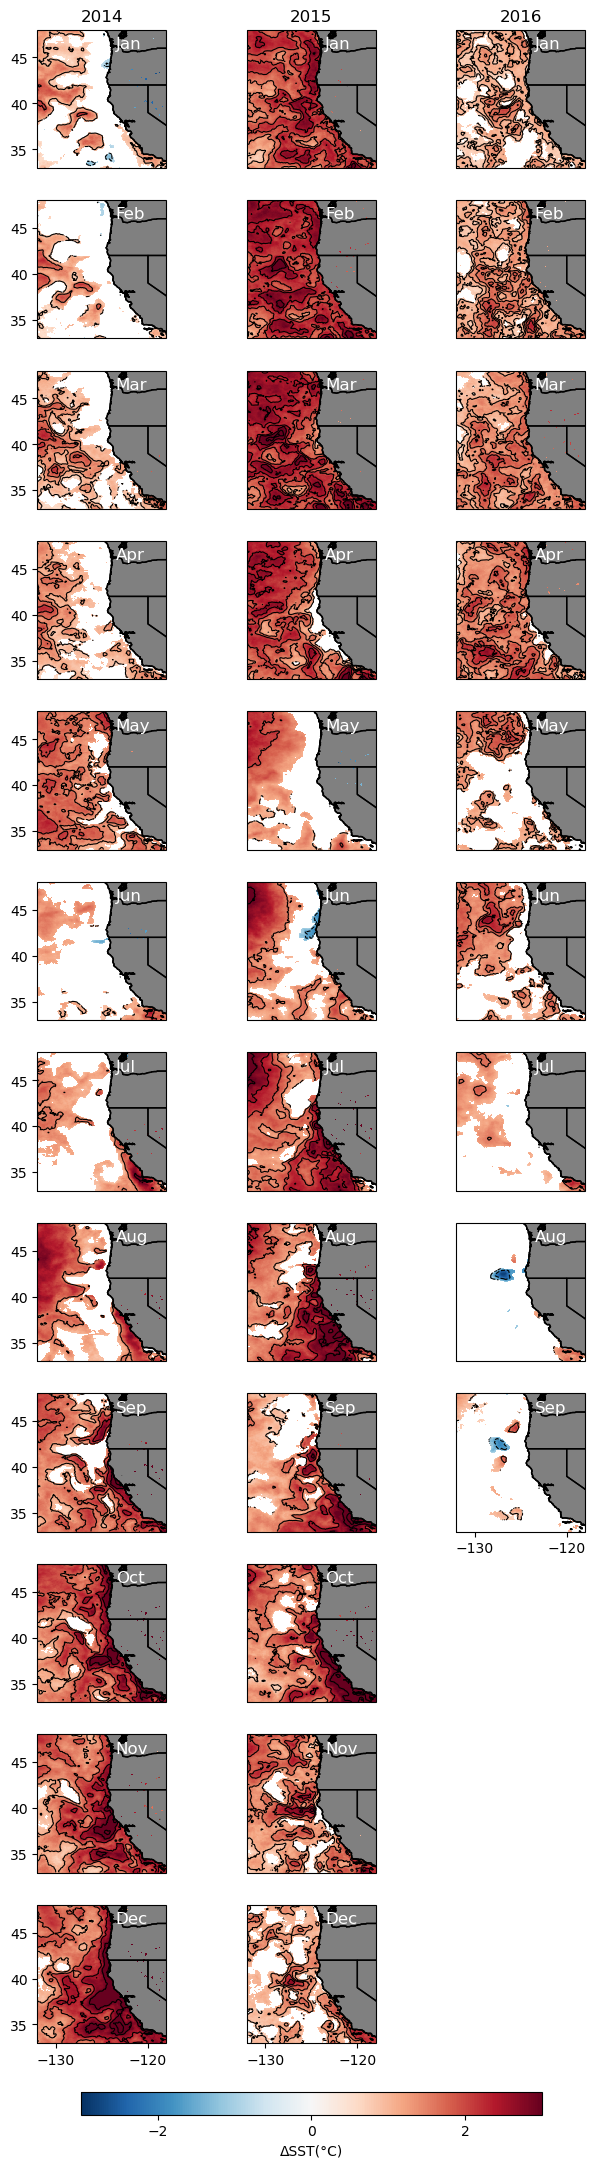

In [17]:
# select data and convert K to °C
SST = ds.analysed_sst - 273.15

# get previous data from 2002 to 2012
ds_prev = SST.sel(time = slice('2002', '2012'))

# calculate the mean for previous data by month 
ds_prev_mean = ds_prev.groupby(ds_prev.time.dt.month).mean()
ds_prev_sd = ds_prev.groupby(ds_prev.time.dt.month).std()

# get data in 2014, 2015, and 2016
ds_2014 = SST.sel(time = slice('2014-01-01', '2014-12-31'))
ds_2015 = SST.sel(time = slice('2015-01-01', '2015-12-31'))
ds_2016 = SST.sel(time = slice('2016-01-01', '2016-12-31'))

# calculate the mean for 2014, 2015, and 2016 by month
ds_2014_mean = ds_2014.groupby(ds_2014.time.dt.month).mean()
ds_2015_mean = ds_2015.groupby(ds_2015.time.dt.month).mean()
ds_2016_mean = ds_2016.groupby(ds_2016.time.dt.month).mean()

# get anomalies 
anomaly_2014 = (ds_2014_mean - ds_prev_mean).where(abs(ds_2014_mean - ds_prev_mean)/ds_prev_sd >= 1)
anomaly_2015 = (ds_2015_mean - ds_prev_mean).where(abs(ds_2015_mean - ds_prev_mean)/ds_prev_sd >= 1)
anomaly_2016 = (ds_2016_mean - ds_prev_mean).where(abs(ds_2016_mean - ds_prev_mean)/ds_prev_sd >= 1)

# create month list for texting
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# plot setup
fig, axs = plt.subplots(nrows = 12, ncols = 3, subplot_kw = dict(projection = crs), figsize = (7, 25))

# define a plotting function
def draw(data, col, year):
    """a function that draw the Monthly SST anomaly for a given year"""
    for i in range(12):
        global plot
        plot = data.sel(month = i+1).plot(col_wrap=3, ax = axs[i, col], transform = crs, add_colorbar = False, vmin = -3, vmax = 3, cmap = "RdBu_r")
        data.sel(month = i+1).plot.contour(ax = axs[i, col], colors = 'black', linewidths = 0.8, cmin = -3, cmax = 3)
        axs[i, col].coastlines("10m", color = "k")
        axs[i, col].add_feature(cfeature.LAND, color = "grey")
        axs[i, col].add_feature(cfeature.STATES.with_scale("10m")) 
        axs[i, col].set_title("")
        axs[i, col].text(-123.5, 46, month[i], fontsize = 12, color = 'white')
        if year == 2014:
            axs[i, col].set_yticks(range(35, 46, 5))
            axs[i, col].set_ylabel("")
        if i == 0:
            axs[i, col].set_title(year)
        if i == 11:
            axs[i, col].set_xticks(range(-130, -119, 10))
            axs[i, col].set_xlabel("")
        if year == 2016 and i == 8:
            axs[i, col].set_xticks(range(-130, -119, 10))
            axs[i, col].set_xlabel("")

# call draw() three times to draw anomalies for 2014, 2015, and 2016
draw(anomaly_2014, 0, 2014)
draw(anomaly_2015, 1, 2015)
draw(anomaly_2016, 2, 2016)

# delete last three months in 2016
fig.tight_layout(w_pad = 0.02)
fig.delaxes(axs[9, 2])
fig.delaxes(axs[10, 2])
fig.delaxes(axs[11, 2])

# add colorbar
colorbar = plt.colorbar(plot, ax = axs, location = 'bottom', shrink = 0.7, pad = 0.02)
colorbar.set_label('ΔSST(°C)')
colorbar.set_ticks(range(-2,3,2))

# save plot
plt.savefig('outputs/Q04.png')
plt.show();